-------------- sklearn Linear Regression Result --------------
theta: [  139.21067402 -8738.01911233]
bias: 89597.9095428
r-square: 0.732945018029


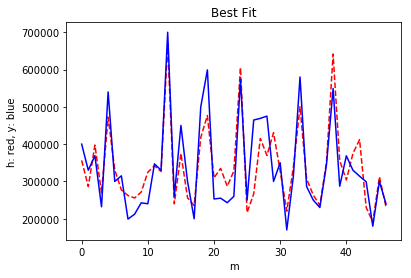

-------------- Tensorflow Result --------------
weights:  [[ 0.94610709 -0.15352631]]
bias:  [ 0.5553121]
r-square:  0.7248690480671534


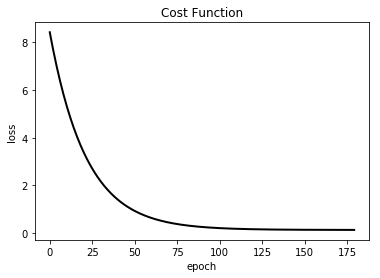

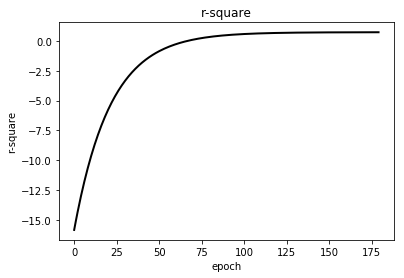

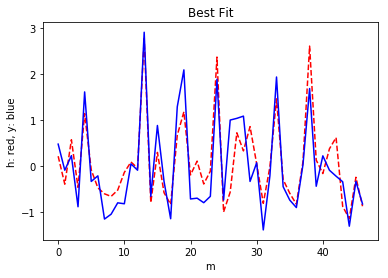

In [1]:
'''
Created on April 4, 2017
Linear Regression - Boston House Price
@author: Cyrano
'''

import numpy as np
import matplotlib.pyplot as plt

# 载入数据集
def loadDataSet():
    dataMat = []; labelMat = []
    
    fr = open('input/Linear/ex1x.txt')
    for line in fr.readlines():
        x = line.strip().split()
        dataMat.append([float(x[0]), float(x[1])])
        
    fr = open('input/Linear/ex1y.txt')
    for line in fr.readlines():
        y = line.strip().split()  
        labelMat.append(float(y[0]))
        
    return dataMat,labelMat

# 特征缩放 - 调节比例
def featureRescaling(mat,col):
    mat[:,col]=(mat[:,col]-mat[:,col].min())/(mat[:,col].max()-mat[:,col].min()) 
    return mat

# 特征缩放 - 标准化
def featureStandardization(mat,col):
    mat[:,col]=(mat[:,col]-mat[:,col].mean())/mat[:,col].std()
    return mat

# 代价函数计算
def Cost(x_mat, y_mat, weights, bias):
    error = x_mat * np.mat(weights) + bias - y_mat
    cost = float(np.sum(pow(error.getA(), 2), axis = 0)) / (2*m)
    return cost

# 计算r-square
def rSquare(x_mat, y_mat, weights, bias):
    y_hat= x_mat * np.mat(weights) + bias
    sse = float(np.sum(pow((y_mat-y_hat).getA(), 2)))
    sst = float(y_mat.var()*m)  
    return 1 - sse / sst

# 绘制代价函数示意图
def plotCost(all_cost):
    plt.plot(all_cost,'k-', label='line 1', linewidth=2)
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.title("Cost Function")
    plt.show()
    
# r-square示意图
def plotRSquare(all_rsquare):
    plt.plot(all_rsquare,'k-', label='line 1', linewidth=2)
    plt.ylabel("r-square")
    plt.xlabel("epoch")
    plt.title("r-square")
    plt.show()
    
    
###########################  
  
x, y = loadDataSet()


print("-------------- sklearn Linear Regression Result --------------")
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(x,y)

theta = lr.coef_
bias = lr.intercept_
rsquare = lr.score(x, y)

#all_result_no_fs.append(np.mat(theta).transpose())

print("theta: " + str(theta))
print("bias: " + str(bias))
print("r-square: " + str(rsquare))

x_mat = np.mat(x)
y_mat = np.mat(y)

h = x_mat * np.mat(theta).transpose() + bias
plt.plot(h,'r--')
plt.plot(y,'b-')
plt.ylabel("h: red, y: blue")
plt.xlabel("m")
plt.title("Best Fit")     
plt.show()



print("-------------- Tensorflow Result --------------")

import tensorflow as tf

x_train = featureStandardization(np.mat(x), 0)
y_train = featureStandardization(np.mat(y).transpose(),0)

m,n = np.shape(x_train)

rate = 0.002
epoch = 180

X = tf.placeholder("float")  
Y = tf.placeholder("float") 
W = tf.Variable(tf.ones([2,1])) 
b = tf.Variable(tf.random_normal([1])) 

all_cost = []
all_rsquare = []

pred = tf.add(tf.matmul(X,W),b)
loss = tf.reduce_mean(tf.pow(pred-Y,2)) / 2 
optimizer = tf.train.GradientDescentOptimizer(rate).minimize(loss)  

init = tf.global_variables_initializer()

# Second part: launch the graph
sess = tf.Session()  
sess.run(init)  

for i in range(epoch): 
    sess.run(optimizer,{ X:x_train, Y:y_train }) 
    all_cost.append(Cost(x_train, y_train, sess.run(W), sess.run(b)))
    all_rsquare.append(rSquare(x_train, y_train, sess.run(W), sess.run(b)))

W = sess.run(W)
b = sess.run(b)
print("weights: ", W.transpose())
print("bias: ", b)

rsquare = rSquare(x_train, y_train, W, b)
print("r-square: ", rsquare)

plotCost(all_cost)
plotRSquare(all_rsquare)

h = x_train * np.mat(W) + b
plt.plot(h,'r--')
plt.plot(y_train,'b-')
plt.ylabel("h: red, y: blue")
plt.xlabel("m")
plt.title("Best Fit")     
plt.show()